In [11]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('roles_alldf_prepro_data.csv')
df

,user_id,self_character,spike_planted,spike_time,round_info_round_end,round_info_round_won,round_info_round_start,ally3_pre_spike_elims,ally3_post_spike_elims,ally3_pre_spike_deaths,...,self_pre_spike_longest_gun_primary_judge,self_pre_spike_longest_gun_primary_marshal,self_pre_spike_longest_gun_primary_none,self_pre_spike_longest_gun_primary_odin,self_pre_spike_longest_gun_primary_operator,self_pre_spike_longest_gun_primary_phantom,self_pre_spike_longest_gun_primary_spectre,self_pre_spike_longest_gun_primary_stinger,self_pre_spike_longest_gun_primary_vandal,round_info_round_length
0,3807,2,0,0,178579,0,134795,0,0,1,...,0,0,1,0,0,0,0,0,0,43784
1,3807,2,1,257180,287772,0,208579,0,0,1,...,0,0,1,0,0,0,0,0,0,79193
2,3807,2,0,0,377967,1,317772,0,0,0,...,0,0,0,0,0,0,0,0,1,60195
3,3807,2,1,471764,487358,0,407967,0,2,0,...,0,0,0,0,0,0,0,0,1,79391
4,3807,2,1,540359,580547,0,517358,0,0,1,...,0,0,1,0,0,0,0,0,0,63189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28954,1018,0,1,1340413,1375064,1,1313681,0,0,0,...,0,0,1,0,0,0,0,0,0,61383
28955,1018,0,0,0,1439659,1,1405064,1,0,1,...,0,0,0,0,0,0,0,0,1,34595
28956,1018,0,0,0,1504595,1,1469659,2,0,1,...,0,0,1,0,0,0,0,0,0,34936
28957,1018,0,1,1562583,1600300,1,1534595,0,0,2,...,0,0,0,0,0,0,0,0,1,65705


In [9]:
df_copy = df.copy()
df_no_userid = df_copy.drop('user_id', axis=1)

df_no_chars = df_no_userid.copy()
columns_to_drop = [col for col in df_no_chars.columns if col.startswith('ally3_character')]
df_no_chars.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop = [col for col in df_no_chars.columns if col.startswith('ally1_character')]
df_no_chars.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop = [col for col in df_no_chars.columns if col.startswith('ally2_character')]
df_no_chars.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop = [col for col in df_no_chars.columns if col.startswith('ally4_character')]
df_no_chars.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop = [col for col in df_no_chars.columns if col.startswith('opponent7_character')]
df_no_chars.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop = [col for col in df_no_chars.columns if col.startswith('opponent6_character')]
df_no_chars.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop = [col for col in df_no_chars.columns if col.startswith('opponent5_character')]
df_no_chars.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop = [col for col in df_no_chars.columns if col.startswith('opponent8_character')]
df_no_chars.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop = [col for col in df_no_chars.columns if col.startswith('opponent9_character')]
df_no_chars.drop(columns_to_drop, axis=1, inplace=True)

df_no_map = df_no_chars.copy()
columns_to_drop = [col for col in df_no_chars.columns if col.startswith('map_')]
df_no_map.drop(columns_to_drop, axis=1, inplace=True)
df_no_map

,self_character,spike_planted,spike_time,round_info_round_end,round_info_round_won,round_info_round_start,ally3_pre_spike_elims,ally3_post_spike_elims,ally3_pre_spike_deaths,ally3_post_spike_deaths,...,self_pre_spike_longest_gun_primary_judge,self_pre_spike_longest_gun_primary_marshal,self_pre_spike_longest_gun_primary_none,self_pre_spike_longest_gun_primary_odin,self_pre_spike_longest_gun_primary_operator,self_pre_spike_longest_gun_primary_phantom,self_pre_spike_longest_gun_primary_spectre,self_pre_spike_longest_gun_primary_stinger,self_pre_spike_longest_gun_primary_vandal,round_info_round_length
0,2,0,0,178579,0,134795,0,0,1,0,...,0,0,1,0,0,0,0,0,0,43784
1,2,1,257180,287772,0,208579,0,0,1,0,...,0,0,1,0,0,0,0,0,0,79193
2,2,0,0,377967,1,317772,0,0,0,0,...,0,0,0,0,0,0,0,0,1,60195
3,2,1,471764,487358,0,407967,0,2,0,1,...,0,0,0,0,0,0,0,0,1,79391
4,2,1,540359,580547,0,517358,0,0,1,0,...,0,0,1,0,0,0,0,0,0,63189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28954,0,1,1340413,1375064,1,1313681,0,0,0,2,...,0,0,1,0,0,0,0,0,0,61383
28955,0,0,0,1439659,1,1405064,1,0,1,0,...,0,0,0,0,0,0,0,0,1,34595
28956,0,0,0,1504595,1,1469659,2,0,1,0,...,0,0,1,0,0,0,0,0,0,34936
28957,0,1,1562583,1600300,1,1534595,0,0,2,0,...,0,0,0,0,0,0,0,0,1,65705


In [21]:
# train test split
X_nocharnousernomap = df_no_map.drop('self_character', axis=1)
y_nocharnousernomap = df_no_map['self_character']

X_train, X_test, y_train, y_test = train_test_split(X_nocharnousernomap, y_nocharnousernomap, test_size=0.2, random_state=1)

In [13]:
def d_tree(X_train,y_train,X_test,y_test):
    dtc = DecisionTreeClassifier(random_state=1)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    y_pred_train = dtc.predict(X_train)
    print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
    print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_test, y_pred))

    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    return dtc

In [14]:
def f_importance(dtc):
    feature_importances = pd.DataFrame(dtc.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
    return feature_importances

In [27]:
dtc = d_tree(X_train,y_train,X_test,y_test)
feature_importances = dtc.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
top_k = 50
selected_features = feature_importances_df.head(top_k)['Feature'].values
filtered_df = df_no_map[selected_features]
filtered_df

Train Accuracy: 1.0
[[5377    0    0    0]
 [   0 6395    0    0]
 [   0    0 4445    0]
 [   0    0    0 6950]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1331
           1       0.86      0.87      0.87      1649
           2       0.81      0.79      0.80      1088
           3       0.84      0.84      0.84      1724

    accuracy                           0.84      5792
   macro avg       0.84      0.84      0.84      5792
weighted avg       0.84      0.84      0.84      5792

Test Accuracy: 0.8413328729281768
[[1130   51   65   85]
 [  55 1442   51  101]
 [  66   73  857   92]
 [  91  110   79 1444]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1331
           1       0.86      0.87      0.87      1649
           2       0.81      0.79      0.80      1088
           3       0.84      0.84      0.84      1724

    accuracy                           0.84      5792

,spike_planted,spike_time,round_info_round_end,round_info_round_won,round_info_round_start,ally3_pre_spike_elims,ally3_post_spike_elims,ally3_pre_spike_deaths,ally3_post_spike_deaths,ally3_pre_spike_assists,...,self_post_spike_first_bloods,ally1_pre_spike_elims,ally1_post_spike_elims,ally1_pre_spike_deaths,ally1_post_spike_deaths,ally1_pre_spike_assists,ally1_post_spike_assists,ally1_pre_spike_headshots,ally1_post_spike_headshots,ally1_pre_spike_wallbangs
0,0,0,178579,0,134795,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1,257180,287772,0,208579,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,377967,1,317772,0,0,0,0,0,...,0,2,0,0,0,0,0,1,0,0
3,1,471764,487358,0,407967,0,2,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1,540359,580547,0,517358,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28954,1,1340413,1375064,1,1313681,0,0,0,2,0,...,0,0,2,0,0,0,0,0,2,0
28955,0,0,1439659,1,1405064,1,0,1,0,0,...,0,4,0,1,0,1,0,2,0,0
28956,0,0,1504595,1,1469659,2,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
28957,1,1562583,1600300,1,1534595,0,0,2,0,0,...,0,0,0,0,1,0,1,0,0,0


In [38]:
y = df_no_map['self_character']
y.shape

(28959,)

In [39]:
X = df_no_map.values[:5000]
X.shape

y = y[:5000]

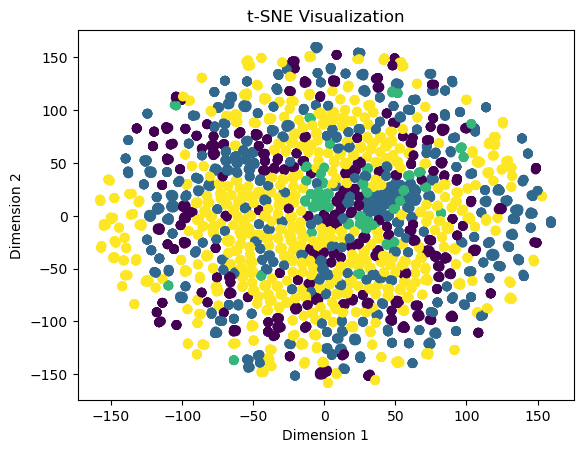

In [47]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(X)
X_embedded.shape

# Scatter plot
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization')
plt.show()

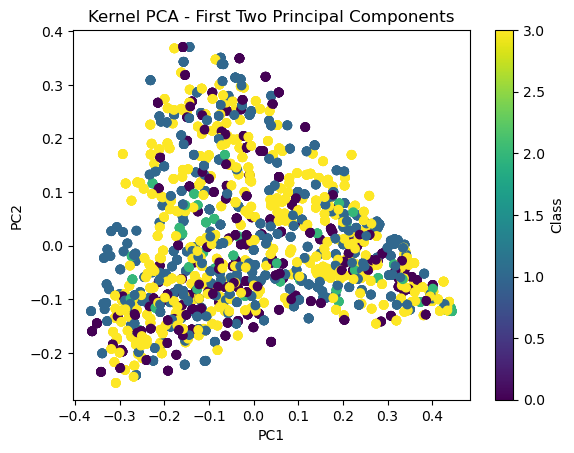

In [45]:
#### from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# Assuming X is your input data

# Perform Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X)

# Visualize the first two principal components with color
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kernel PCA - First Two Principal Components')
plt.colorbar(label='Class')
plt.show()

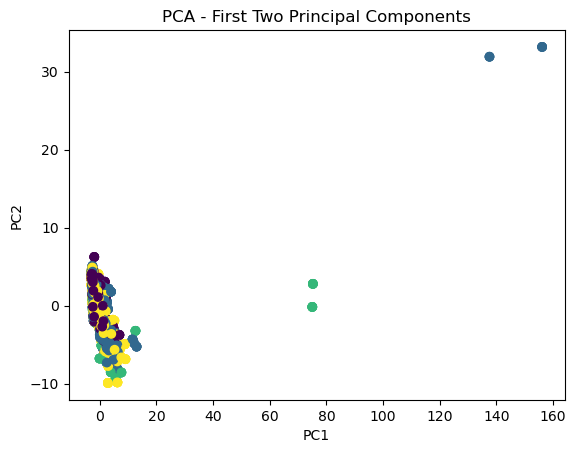

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X is your input data

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - First Two Principal Components')
plt.show()